#  차원 축소
## 주성분 분석(Principal Component Analysis)

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

from IPython.display import Image
width=800; height=500

## 1. 주성분 분석(PCA)과 시각화

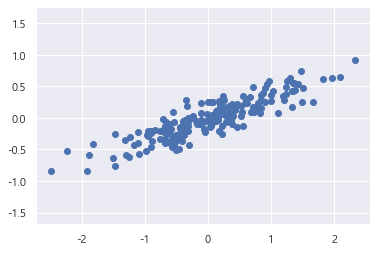

In [23]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

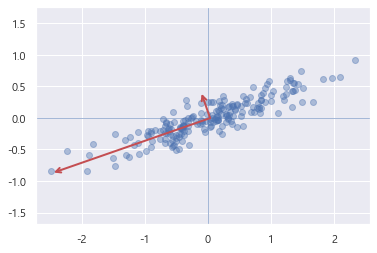

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

##### 원래 데이터의 기저벡터(base vector)인 (1,0), (0,1)에서 관측된 x1, x2의 분산은 

  * 새로운 주성분(principal components) 벡터(화살표)에서 주성분 1과 2에 의해 표현될 수 있고(*principal axes*으로 자료 변환)
  * 원래 데이터의 총변동량(원래 데이터의 평균조정된 데이터의 내적(공분산)의 trace(x1, x1의 분산의 합))의 
  * 77%를 주성분 1은 76%, 1%를 각각 설명한다.


##### 즉 원래데이터는 새로운 기저벡터인 주성분벡터에서 projection(data representation, transformation)이 되었다.
* The transformation from data axes to principal axes)
   * affine transformation, which is composed of a translation, rotation, and uniform scaling.

<font color='red'> 주성분(components) 행렬은 2개의 직교벡터 (-0.9444, -0.3286)과 (-0.3286, 0.9444)로 구성

In [5]:
print('2개의 주성분(components) 직교벡터(Orthogonal matrix)___')
print(pca.components_)

2개의 주성분(components) 직교벡터(Orthogonal matrix)___
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


<font color='red'> 주성분 행렬은 직교행렬(Orthogonal matrix)로 직교행렬의 내적은 Identity 행렬

In [6]:
print('직교행렬의 내적은 공분산 행렬(Identity matrix)___')
(pca.components_.T@pca.components_).round(2)

직교행렬의 내적은 공분산 행렬(Identity matrix)___


array([[ 1., -0.],
       [-0.,  1.]])

<font color='red'> 주성분의 총변동량에 대한 설명비율(explained variance)은 2개 직교벡터의 화살표 크기

In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [8]:
print('2개의 주성분(components) 직교벡터(Orthogonal matrix)___')
print(pca.components_)
print('직교행렬의 내적은 공분산 행렬(Identity matrix)___')
print((pca.components_.T@pca.components_).round(2))
print(f'총변동량 설명비율(%): {pca.explained_variance_.round(4)*100}')

2개의 주성분(components) 직교벡터(Orthogonal matrix)___
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
직교행렬의 내적은 공분산 행렬(Identity matrix)___
[[ 1. -0.]
 [-0.  1.]]
총변동량 설명비율(%): [76.25  1.85]


## 2. 주성분분석실시 전에는 반드시 자료표준화(Importance of Feature Scaling_
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [31]:
from sklearn.datasets import make_classification
X, _ = make_classification(n_samples=500, n_classes=2, weights=[0.8, 0.2],
                              n_features = 20, n_informative = 5, n_redundant = 15,
                              random_state=1)
print(f'평균: {X.mean(0).round(2)}')
print(f'표준편차: {X.std(0)}')

평균: [ 1.04 -0.95  0.02 -0.42 -0.61 -1.58  0.85  1.74 -0.89  0.71  0.93 -0.13
  0.26  0.17  1.17 -0.23  0.08  1.34 -1.03 -0.46]
표준편차: [2.12374486 1.65782155 1.60765387 2.56950786 1.38322962 1.85286165
 1.16289566 1.72950857 1.06834667 1.04878302 1.33239309 1.54851068
 1.63078651 1.85982377 1.68986829 1.66160233 1.46829958 2.05011925
 1.91425235 1.83587949]


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean(0).round(2)}, 표준펀차: {X_scaled.std(0)}')

평균: [-0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0.
  0. -0.], 표준펀차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

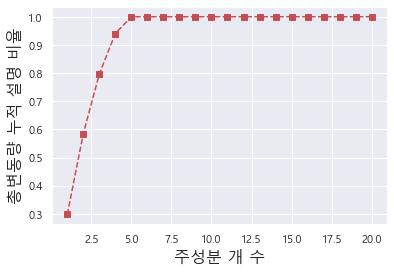

In [33]:
from sklearn.decomposition import PCA
X_pca = PCA().fit(X_scaled)
plt.plot(np.arange(1, X_scaled.shape[1]+1), np.cumsum(X_pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16')
plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [34]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) # X_pca= PCA(n_components=5).fit(X_scaled).transform(X_scaled)
                                # X_pca= PCA(n_components=5).fit_transform(X_scaled)
print('5개의 주성분구성 자료의 공분산, 5 by 5')
(X_pca.T@X_pca).round(2)
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

PCA(n_components=5)

5개의 주성분구성 자료의 공분산, 5 by 5


array([[2978.33,   -0.  ,    0.  ,    0.  ,   -0.  ],
       [  -0.  , 2871.37,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  , 2117.95,    0.  ,   -0.  ],
       [   0.  ,    0.  ,    0.  , 1436.87,    0.  ],
       [  -0.  ,    0.  ,   -0.  ,    0.  ,  595.48]])

원래 데이터의 총변동량: 9999.999999999998
주성분 자료의 총변동량: 10000.0


In [20]:
PCA(n_components=5).fit(X_scaled).transform(X_scaled)
PCA(n_components=5).fit_transform(X_scaled)

array([[-4.63093464,  0.10004578, -3.36360781,  1.7212647 ,  1.04323882],
       [ 1.6750281 ,  3.85537405, -0.5130476 ,  2.06806535,  0.89462242],
       [-2.07846922, -2.73340069,  0.6576643 ,  1.14742065, -0.74725623],
       ...,
       [ 2.91569809, -0.43933638,  0.97472991, -1.69771903,  0.23483207],
       [ 3.75498254,  1.05317344, -0.86925199, -1.65827658,  0.12025071],
       [ 2.38463299,  1.2944352 , -0.19150087,  1.58662334,  0.09942204]])

array([[-4.63093464,  0.10004578, -3.36360781,  1.7212647 ,  1.04323882],
       [ 1.6750281 ,  3.85537405, -0.5130476 ,  2.06806535,  0.89462242],
       [-2.07846922, -2.73340069,  0.6576643 ,  1.14742065, -0.74725623],
       ...,
       [ 2.91569809, -0.43933638,  0.97472991, -1.69771903,  0.23483207],
       [ 3.75498254,  1.05317344, -0.86925199, -1.65827658,  0.12025071],
       [ 2.38463299,  1.2944352 , -0.19150087,  1.58662334,  0.09942204]])

## 3 원자료 복원
- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용

In [37]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=2)

original shape:    (500, 20)
transformed shape: (500, 2)


##### 20차원의 원자료를 2차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

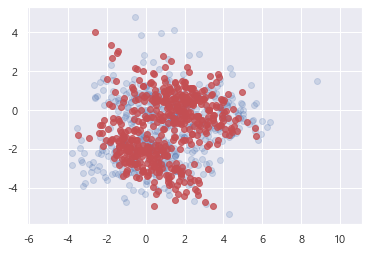

In [38]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

## 4. 주성분 분석(PCA)
- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)
   
 https://angeloyeo.github.io/2019/08/01/SVD.html

In [40]:
from scipy import misc
sns.reset_defaults() 
img_array = misc.face()
red_array = img_array[:, :, 0] #img_gray = img_array @ [0.2126, 0.7152, 0.0722]
# green_array = img_array[:, :, 1], blue_array = img_array[:, :, 2]
img_array.shape
red_array.shape

(768, 1024, 3)

(768, 1024)

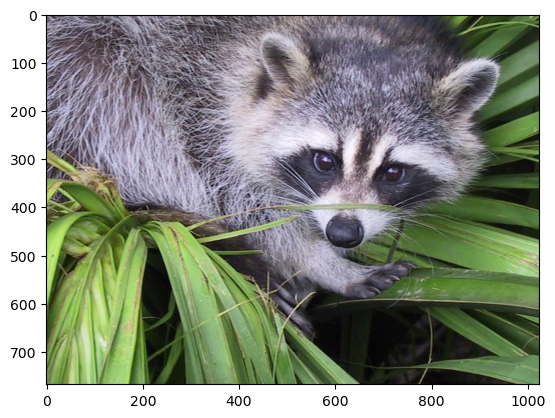

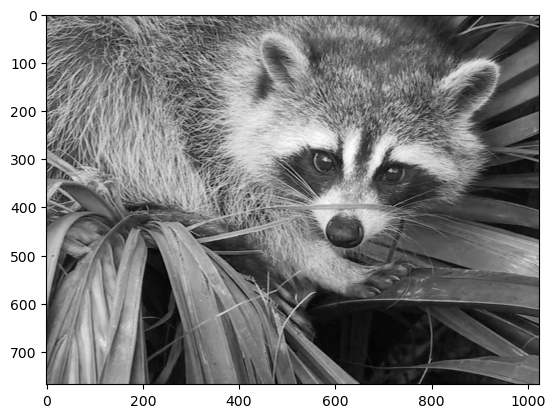

In [42]:
plt.imshow(img_array, cmap="gray"); plt.show()
plt.imshow(red_array, cmap="gray")

## Eigen vector와 PCA의 기하학적 의미

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/25d526099011bbd1f25ca18d062053b519c4ca1c'>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/500px-Eigenvalue_equation.svg.png'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Eigenvectors_of_a_linear_operator.gif/400px-Eigenvectors_of_a_linear_operator.gif'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/0/06/Eigenvectors.gif'>

## 5. PCA for visualization: Hand-written digits

고차원 자료인 수기체 이미지에 PCA 적용
- 8×8 pixel images 자료, 총 64차원
- 2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인

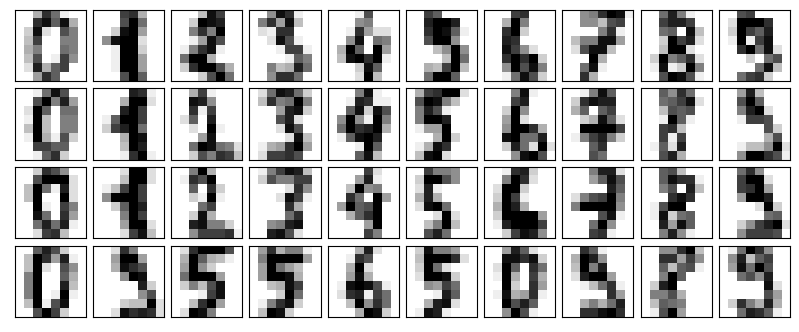

In [47]:
from sklearn.datasets import load_digits
digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

64차원 원자료   크기: (1797, 64)
 2차원 축소자료 크기: (1797, 2)


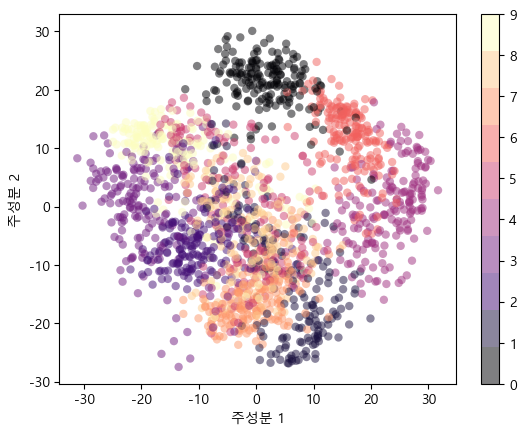

In [56]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(f'64차원 원자료   크기: {digits.data.shape}')
print(f' 2차원 축소자료 크기: {projected.shape}')

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('주성분 1'); plt.ylabel('주성분 2')
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영입니다.
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

## 6. PCA as Noise Filtering

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

잡음(noise)를 발생시켜 데이터에 주입

- 잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출
- 주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원
- 고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

원자료 총변동량의 50%를 설명하는 주성분 개수: 9


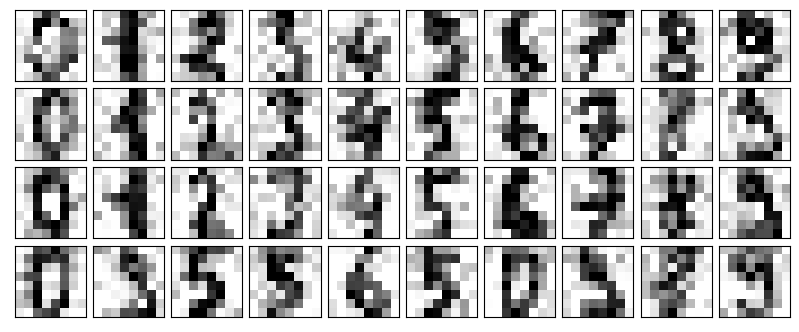

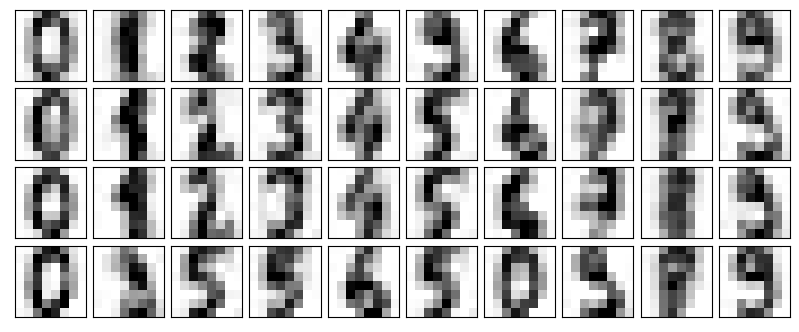

In [18]:
noisy = np.random.normal(digits.data, 3)
pca = PCA(0.50).fit(noisy)
print(f'원자료 총변동량의 50%를 설명하는 주성분 개수: {pca.n_components_}')
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(noisy); plt.show()
plot_digits(filtered)

## 7.  Eigenfaces
### SVD(singular value decomposition)
https://en.wikipedia.org/wiki/Singular_value_decomposition
<img src='https://upload.wikimedia.org/wikipedia/commons/e/e9/Singular_value_decomposition.gif'>
<img src='https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-01_SVD/pic_SVD.png'>

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

원래 이미지 자료의 차원: (1348, 62, 47)


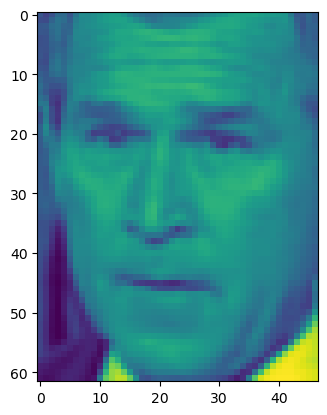

In [49]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD
faces = fetch_lfw_people(min_faces_per_person=60)
faces.keys()
print(f'원래 이미지 자료의 차원: {faces.images.shape}')
plt.imshow(faces.images[1])

### Truncated SVD 로 차원축소

In [50]:
pca = TruncatedSVD(150)
pca.fit(faces.data)
faces_svd = pca.fit(faces.data).transform(faces.data)
faces_svd.shape

TruncatedSVD(n_components=150)

(1348, 150)

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

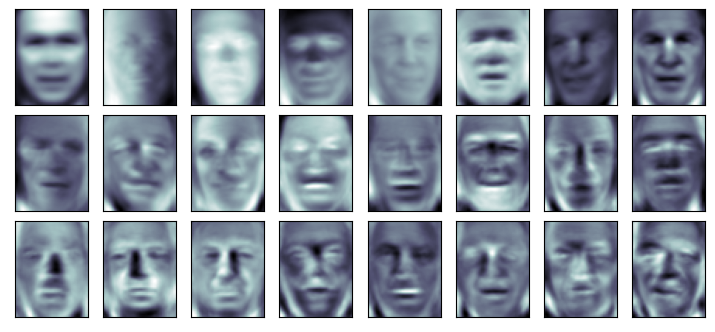

In [51]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

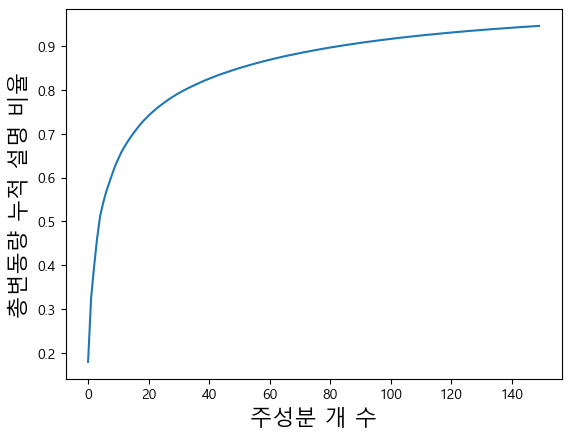

In [52]:
plt.rcParams['font.family']='Malgun Gothic'
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

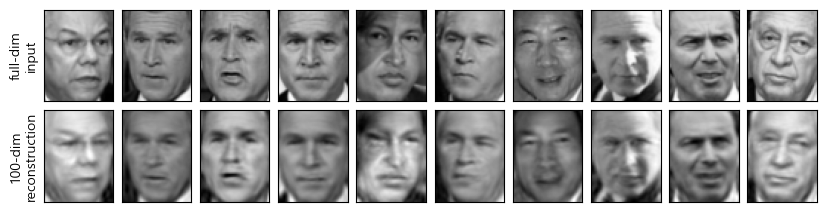

In [53]:
projected = pca.inverse_transform(faces_svd)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

# END